**Madden 24 Player ratings analysis**

Objectives:
- Analyze player ratings from Madden NFL 24 to uncover trends and patterns.
- Visualize data distributions and correlations between player attributes.
- Build a linear regression model to identify factors affecting player ratings.
- Gain insights into how specific attributes (e.g., speed, strength) influence overall ratings.

Project Summary:
- Libraries Used: pandas, numpy, seaborn, matplotlib, scikit-learn.
- Dataset Source: Madden 24 Player Ratings from Kaggle.
- Data Handling: Load, clean, and preprocess data for analysis.
- Exploratory Analysis: Generate descriptive statistics and visualizations.
- Modeling: Apply linear regression to predict and interpret player ratings.

  

Import all libraries needed

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


Code for importing dataset from kaggle website

In [20]:
# Replace with the dataset path from the Kaggle page, such as "dtrade84/madden-24-player-ratings"
dataset = "dtrade84/madden-24-player-ratings"

# Download the dataset
!kaggle datasets download -d {dataset} --unzip

# Load the data (adjust filename as needed)
import pandas as pd
data = pd.read_csv("maddennfl24fullplayerratings.csv")  # Replace with actual file name in the dataset
print(data.head())


zsh:1: command not found: kaggle
         Team Position            Full Name  Overall Rating  Jersey Number  \
0     Broncos       DT       Jordan Jackson              64             90   
1  Buccaneers      MLB  Ulysees Gilbert III              63             57   
2       49ers       TE         Cameron Latu              65             81   
3       Bears       FS        Eddie Jackson              85              4   
4       Bears      MLB        Terrell Lewis              63             52   

   Speed  Acceleration  Strength  Agility  Awareness  ...  Weight  Age  \
0     74            74        78       76         67  ...     294   25   
1     87            91        68       82         60  ...     230   26   
2     80            84        73       74         69  ...     244   23   
3     91            89        63       85         90  ...     206   29   
4     83            88        74       83         66  ...     262   25   

   Birthdate  Years Pro                  Running Styl

Code for importing data after dowloading dataset from kaggle and moving it to local file location

In [15]:
# Read in the data
file_name = r"/Users/rifatkhan/Documents/Data Science Stuff/Madden24playerratings/maddennfl24fullplayerratings.csv"
df = pd.read_csv(file_name)

Explore the dataset
- Display the top 5 rows of the dataset

In [23]:
df.head(5)

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,...,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,...,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,...,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,...,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,...,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,...,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


Find the number of rows and columns 

In [26]:
rows = str(df.shape[0]) #shape 0 is rows
cols = str(df.shape[1]) #shape 1 is columns
print('The data set has', rows, 'rows and', cols, 'columns')

The data set has 2369 rows and 69 columns


List the headings for the dataset

In [29]:
list(df.columns)

['Team',
 'Position',
 'Full Name',
 'Overall Rating',
 'Jersey Number',
 'Speed',
 'Acceleration',
 'Strength',
 'Agility',
 'Awareness',
 'Catching',
 'Carrying',
 'Throw Power',
 'Kick Power',
 'Kick Accuracy',
 'Run Block',
 'Pass Block',
 'Tackle',
 'Break Tackle',
 'Jumping',
 'Kick Return',
 'Injury',
 'Stamina',
 'Toughness',
 'Trucking',
 'Change Of Direction',
 'Ball Carrier Vision',
 'Stiff Arm',
 'Spin Move',
 'Juke Move',
 'Impact Blocking',
 'Run Block Power',
 'Run Block Finesse',
 'Pass Block Power',
 'Pass Block Finesse',
 'Lead Block',
 'Break Sack',
 'Throw Under Pressure',
 'Power Moves',
 'Finesse Moves',
 'Block Shedding',
 'Pursuit',
 'Play Recognition',
 'Man Coverage',
 'Zone Coverage',
 'Spectacular Catch',
 'Catch In Traffic',
 'Short Route Running',
 'Medium Route Running',
 'Deep Route Running',
 'Hit Power',
 'Press',
 'Release',
 'Throw Accuracy Short',
 'Throw Accuracy Mid',
 'Throw Accuracy Deep',
 'Play Action',
 'Throw On The Run',
 'Height',
 'Weight

In [31]:
df.describe()

,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Total Salary,Signing Bonus
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,...,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2.369000e+03,2.369000e+03
mean,69.988181,48.095821,80.518362,83.211904,71.710848,76.368088,70.374420,55.279443,54.807514,30.316589,...,13.854369,13.726045,15.980160,74.094977,243.569016,25.916843,35502.728577,3.420431,6.273856e+06,4.701942e+06
std,9.694438,29.998939,10.355249,9.914619,12.309682,11.467658,11.260897,20.712774,18.173667,15.901733,...,16.333656,16.590090,17.633708,3.038855,47.941674,2.945351,1279.775500,2.875312,1.361592e+07,1.144004e+07
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,0.000000e+00
25%,64.000000,22.000000,73.000000,77.000000,62.000000,68.000000,63.000000,35.000000,40.000000,22.000000,...,6.000000,6.000000,6.000000,72.000000,202.000000,24.000000,34948.000000,1.000000,1.010000e+06,0.000000e+00
50%,69.000000,47.000000,84.000000,87.000000,72.000000,80.000000,70.000000,60.000000,58.000000,26.000000,...,6.000000,6.000000,6.000000,74.000000,233.000000,25.000000,35721.000000,3.000000,3.480000e+06,4.800000e+05
75%,75.000000,75.000000,89.000000,91.000000,82.000000,85.000000,78.000000,72.000000,69.000000,32.000000,...,14.000000,15.000000,19.000000,76.000000,292.000000,27.000000,36264.000000,5.000000,4.520000e+06,3.000000e+06
max,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,98.000000,99.000000,...,93.000000,98.000000,98.000000,81.000000,380.000000,39.000000,37544.000000,18.000000,1.990000e+08,1.407700e+08


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  2369 non-null   object
 1   Position              2369 non-null   object
 2   Full Name             2369 non-null   object
 3   Overall Rating        2369 non-null   int64 
 4   Jersey Number         2369 non-null   int64 
 5   Speed                 2369 non-null   int64 
 6   Acceleration          2369 non-null   int64 
 7   Strength              2369 non-null   int64 
 8   Agility               2369 non-null   int64 
 9   Awareness             2369 non-null   int64 
 10  Catching              2369 non-null   int64 
 11  Carrying              2369 non-null   int64 
 12  Throw Power           2369 non-null   int64 
 13  Kick Power            2369 non-null   int64 
 14  Kick Accuracy         2369 non-null   int64 
 15  Run Block             2369 non-null   

Let's see if there is any missing data 

In [36]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} = {}%'.format(col,pct_missing))

Team = 0.0%
Position = 0.0%
Full Name = 0.0%
Overall Rating = 0.0%
Jersey Number = 0.0%
Speed = 0.0%
Acceleration = 0.0%
Strength = 0.0%
Agility = 0.0%
Awareness = 0.0%
Catching = 0.0%
Carrying = 0.0%
Throw Power = 0.0%
Kick Power = 0.0%
Kick Accuracy = 0.0%
Run Block = 0.0%
Pass Block = 0.0%
Tackle = 0.0%
Break Tackle = 0.0%
Jumping = 0.0%
Kick Return = 0.0%
Injury = 0.0%
Stamina = 0.0%
Toughness = 0.0%
Trucking = 0.0%
Change Of Direction = 0.0%
Ball Carrier Vision = 0.0%
Stiff Arm = 0.0%
Spin Move = 0.0%
Juke Move = 0.0%
Impact Blocking = 0.0%
Run Block Power = 0.0%
Run Block Finesse = 0.0%
Pass Block Power = 0.0%
Pass Block Finesse = 0.0%
Lead Block = 0.0%
Break Sack = 0.0%
Throw Under Pressure = 0.0%
Power Moves = 0.0%
Finesse Moves = 0.0%
Block Shedding = 0.0%
Pursuit = 0.0%
Play Recognition = 0.0%
Man Coverage = 0.0%
Zone Coverage = 0.0%
Spectacular Catch = 0.0%
Catch In Traffic = 0.0%
Short Route Running = 0.0%
Medium Route Running = 0.0%
Deep Route Running = 0.0%
Hit Power = 0.

Determine duplicates in set

In [39]:
sum(df.duplicated())

0

Sort the values based on Team name, position played and Overall Rating

In [42]:
df= df.sort_values(['Team', 'Position', 'Overall Rating'], axis= 0, ascending = [True,True,False], inplace= False)
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,...,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
2368,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2031,49ers,C,Jake Brendel,74,64,71,75,84,70,83,...,299,30,33857,7,Default Stride Awkward,C_PassProtector,UCLA,7850000,7960000,Right
953,49ers,C,Jon Feliciano,72,55,59,56,85,64,82,...,325,31,33644,8,Default Stride Awkward,C_Power,Miami,500000,1750000,Right
1663,49ers,C,Keith Ismael,61,67,61,69,83,52,73,...,310,25,36001,3,Default Stride Awkward,C_Agile,San Diego St.,940000,0,Right
1059,49ers,CB,Charvarius Ward,87,7,91,88,64,84,90,...,196,27,35201,5,Short Stride Loose,CB_MantoMan,Mid Tenn St.,2600000,25520000,Right


Convert Birthdate column to python date format

In [45]:
# Convert the 'Birthdate' column from Excel-style serial date to datetime format
df['Birthdate_converted'] = pd.to_datetime(df['Birthdate'],origin ='1899-12-30' , unit='D')

# Display the first few rows with the new format
print(df[['Birthdate', 'Birthdate_converted']].head())

      Birthdate Birthdate_converted
2368          1          1899-12-31
2031      33857          1992-09-10
953       33644          1992-02-10
1663      36001          1998-07-25
1059      35201          1996-05-16


Display Birthdate in Year, month and Day columns  

In [48]:

#Display only year
df['Year'] = df['Birthdate_converted'].dt.year

#Convert datetime value of month to string value of month with maximum 3 letter abbreviation 
df['Month'] = df['Birthdate_converted'].dt.month_name().str.slice(stop=3)

#Display day of month
df['Date'] = df['Birthdate_converted'].dt.day
df.tail()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,...,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness,Birthdate_converted,Year,Month,Date
1839,Vikings,WR,Jalen Reagor,71,5,93,91,62,91,58,...,Default Stride Loose,WR_Playmaker,TCU,4220000,0,Right,1999-01-02,1999,Jan,2
510,Vikings,WR,Brandon Powell,70,19,86,88,49,85,75,...,Short Stride Loose,WR_Slot,Florida,810000,280000,Right,1995-09-12,1995,Sep,12
1058,Vikings,WR,Jalen Nailor,69,83,91,94,58,87,67,...,Short Stride Default,WR_DeepThreat,Michigan St.,3670000,160000,Right,1999-03-02,1999,Mar,2
1810,Vikings,WR,Trishton Jackson,64,9,89,91,52,87,57,...,Default Stride Loose,WR_Playmaker,Syracuse,870000,0,Right,1998-03-09,1998,Mar,9
435,Vikings,WR,Blake Proehl,63,13,90,92,57,82,59,...,Long Stride Default,WR_Slot,East Carolina,870000,0,Right,1999-01-12,1999,Jan,12


Convert the total Salary and the Signing bonus column into comma seperated values by the thousands 

In [51]:
df[' Total Salary thousands seperated '] = df.apply(lambda x: "{:,}".format(x[' Total Salary ']), axis=1)
df[' Signing Bonus thousands seperated  '] = df.apply(lambda x: "{:,}".format(x[' Signing Bonus ']), axis=1)

# **Data analysis** 

Lets look at the distribution in player ratings in the data set

<Axes: xlabel='Overall Rating', ylabel='Count'>

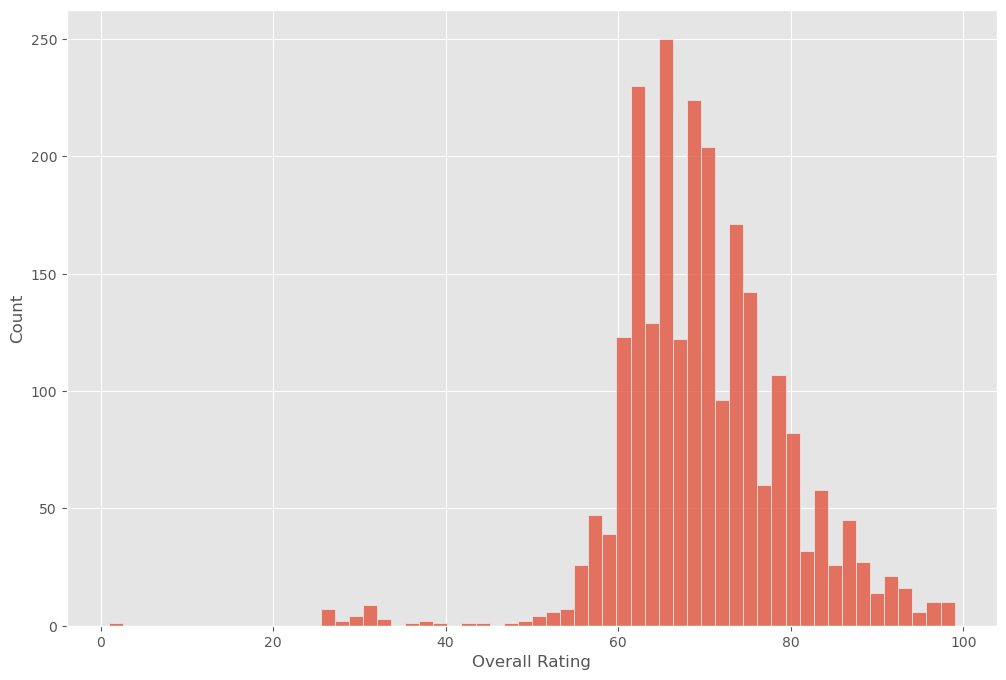

In [55]:
sns.histplot(df['Overall Rating'])

There seems to be a normal disribution in the data with most falling between 60 and 75.

Determine the outliers of the plot

In [59]:
df['Overall Rating'].describe()

count    2369.000000
mean       69.988181
std         9.694438
min         1.000000
25%        64.000000
50%        69.000000
75%        75.000000
max        99.000000
Name: Overall Rating, dtype: float64

<Axes: xlabel='Overall Rating'>

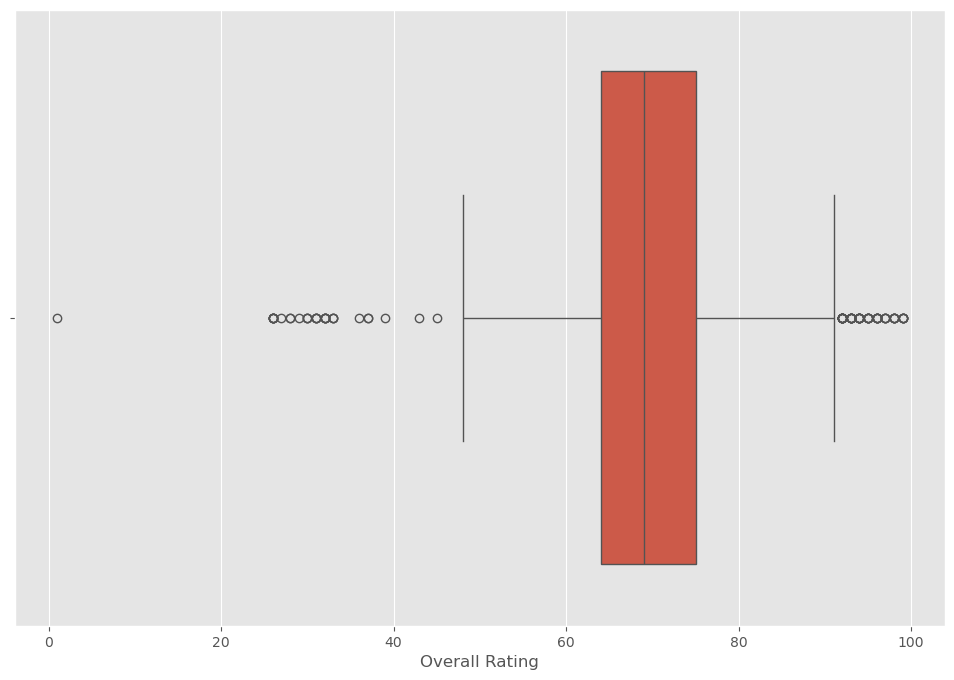

In [61]:
sns.boxplot(x='Overall Rating', data=df)

Determine what most NFL player ratings are along with how many superstars there are and how many poor quality players there are

In [64]:
#Determine the interquartile range where around 50% of player ratings data are 
IQR = df['Overall Rating'].quantile(0.75) - df['Overall Rating'].quantile(0.25)

#Use IQR to determine the lower and upper bounds for where most of the data lies 
lbound = df['Overall Rating'].quantile(0.25) - IQR*1.5
ubound = df['Overall Rating'].quantile(0.75) + IQR*1.5

#Determine where the outliers are. These outliers will be assumed to be players who are extremely exceptional or extremely poor
Super_star= len(df[df['Overall Rating'] > ubound])
Borderline = len(df[df['Overall Rating'] < lbound])
Outliers = Super_star + Borderline

print('Most of the players are rated bewteeen',lbound, 'and', ubound, ', with', Super_star
      , 'superstar players and', Borderline, 'borderline professional players.')

Most of the players are rated bewteeen 47.5 and 91.5 , with 53 superstar players and 32 borderline professional players.


Let's see the average rating by position and which position has the highest overall rating

In [67]:
#Determine the average rating by position, and get the mean 
Pos_avg = df.groupby(['Position'])['Overall Rating'].mean().reset_index()

#Add column header to new dataframe
Pos_avg.columns=['Position', 'Average Overall Rating']

#Sort Table based on highest to lowest average rating
Pos_avg = Pos_avg.sort_values(by='Average Overall Rating',ascending = False)

Pos_avg['Average Overall Rating'] = Pos_avg['Average Overall Rating'].map("{:,.2f}".format)
Pos_avg

,Position,Average Overall Rating
7,K,74.77
13,P,74.76
21,WR,72.77
6,HB,72.37
19,SS,71.68
2,CB,71.58
5,FS,71.23
15,RE,71.11
11,LT,71.05
10,LOLB,70.66


In [69]:
print("The position with the highest average is:", Pos_avg['Position'][6], 'with an average rating of', Pos_avg['Average Overall Rating'].max(axis=0))

The position with the highest average is: HB with an average rating of 74.77


Now let us take a look at some of the highest correlated values with Overall rating

In [72]:
num_df = df.select_dtypes(include = ['int64', 'float64']) #searches for numerical values only 
Rating_corr = num_df.corr()['Overall Rating'] #finds correlation between Overall rating and other values 
print(Rating_corr.sort_values(ascending = False).head(10)) #Display the tope 10 highest values in correlation 

Overall Rating     1.000000
Awareness          0.768398
Stamina            0.596035
 Signing Bonus     0.550811
 Total Salary      0.452096
Years Pro          0.303328
Agility            0.268796
Speed              0.252093
Toughness          0.227335
Acceleration       0.225444
Name: Overall Rating, dtype: float64


There appears to be one correlation value in the table above 0.7, which indicates if two values are higly correlated. Let us graph this on a regression plot.

Text(0.5, 1.0, 'Overall Rating vs Awareness')

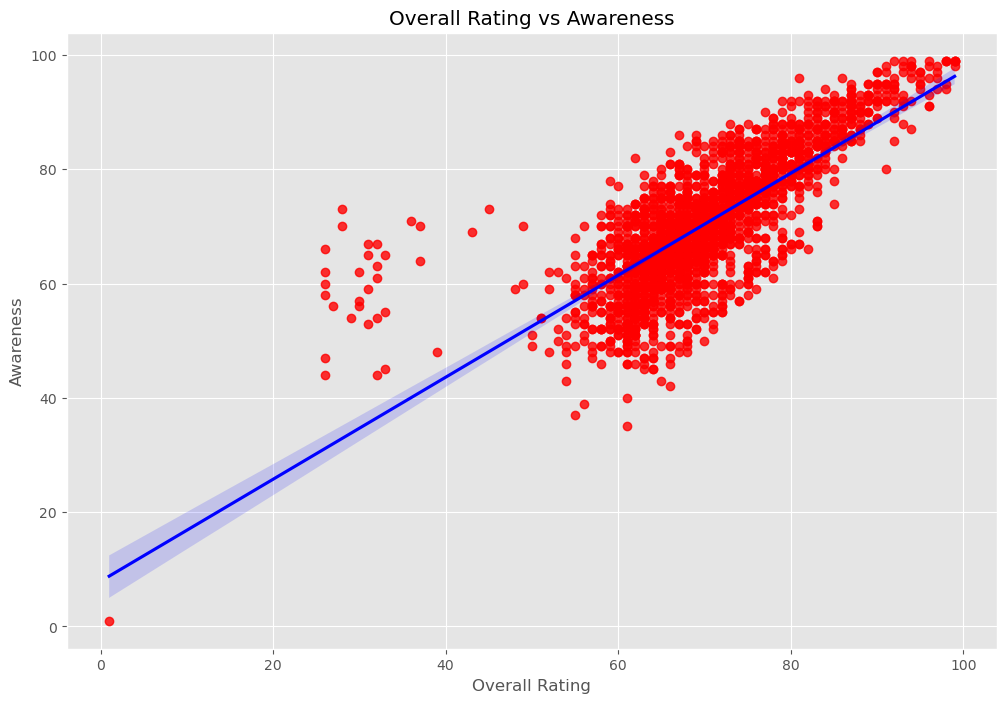

In [75]:
sns.regplot(x = 'Overall Rating', y='Awareness', data = df, 
            scatter_kws = {"color": "r" }, line_kws= {"color" : "b"}) 
plt.title("Overall Rating vs Awareness")

Now Let's see which positions get paid the most

In [78]:
#Determine the average rating by position, and get the mean 
Sal_avg = df.groupby(['Position'])[' Total Salary '].mean().reset_index()

#Add column header to new dataframe
Sal_avg.columns=['Position', 'Average Total Salary']

#Sort Table based on highest to lowest average rating
Sal_avg = Sal_avg.sort_values(by='Average Total Salary',ascending = False)



In [80]:
Sal_avg['Average Total Salary'] = Sal_avg['Average Total Salary']/ 1000000
Sal_avg['Average Total Salary'] = Sal_avg['Average Total Salary'].map("${:,.2f}M".format)
Sal_avg

,Position,Average Total Salary
14,QB,$17.70M
11,LT,$9.96M
10,LOLB,$9.01M
18,RT,$7.61M
15,RE,$6.98M
21,WR,$6.30M
3,DT,$6.10M
9,LG,$6.02M
16,RG,$5.93M
7,K,$5.74M


From the table, we can see that the QB's are paid on average the most, followed by Left Tackle, left outside linebacker and Right Tackle.

Lets compare the average salary and average overall rating in a table

In [84]:
merged_df = pd.merge(Pos_avg, Sal_avg, on='Position', how='inner')
merged_df.sort_values(by=['Average Overall Rating'], ascending=False)

,Position,Average Overall Rating,Average Total Salary
0,K,74.77,$5.74M
1,P,74.76,$3.98M
2,WR,72.77,$6.30M
3,HB,72.37,$3.83M
4,SS,71.68,$4.85M
5,CB,71.58,$5.14M
6,FS,71.23,$5.51M
7,RE,71.11,$6.98M
8,LT,71.05,$9.96M
9,LOLB,70.66,$9.01M


From the table above, we can see there does not appear to be any correlation between the average salary and average overall rating

Now lets see how the total salary is correlated to the other values

In [88]:
num_df = df.select_dtypes(include = ['int64', 'float64']) #searches for numerical values only 

#finds correlation between Overall rating and other values 
Rating_corr = num_df[num_df.columns[0:]].corr()['Overall Rating'][:].to_frame().sort_values(by = ['Overall Rating'],ascending = False).round(3).head(20)  

Rating_corr


,Overall Rating
Overall Rating,1.000
Awareness,0.768
Stamina,0.596
Signing Bonus,0.551
Total Salary,0.452
Years Pro,0.303
Agility,0.269
Speed,0.252
Toughness,0.227
Acceleration,0.225


From the table, we can see that the signing bonus is most correlated with Total Salary. This makes sense as when a player signs a contract, both the annual salary and the signing bonus should affect the total Salary. 

Let's visualize the Total Salary with the highest correlated values

Text(0.5, 1.0, 'Total Salary vs Signing Bonus')

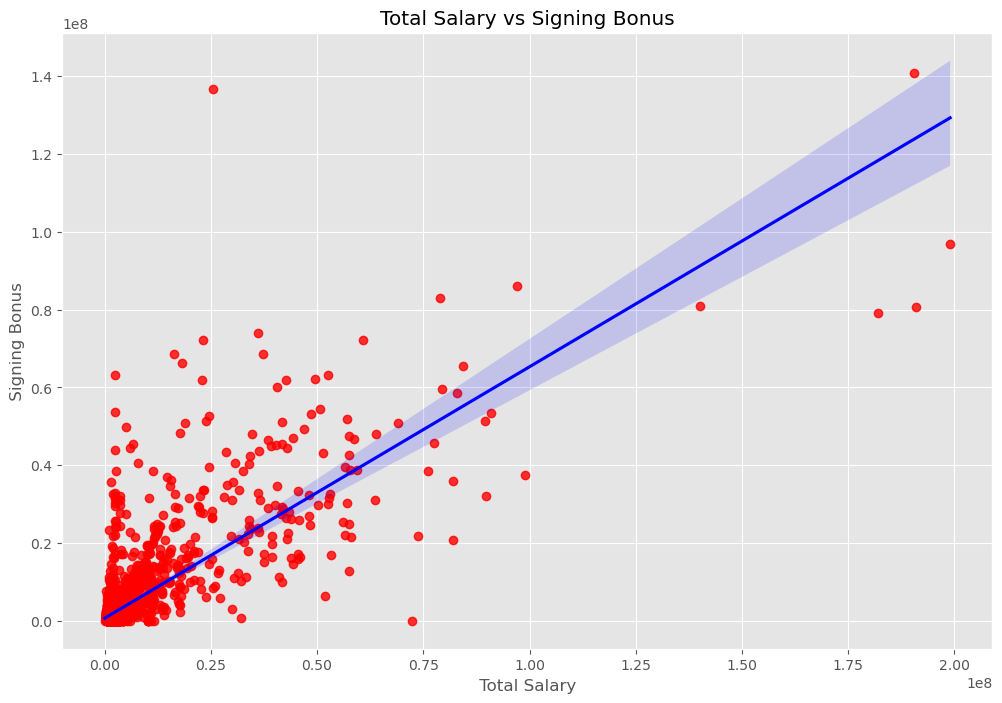

In [92]:
sns.regplot(x = ' Total Salary ', y=' Signing Bonus ', data = df, 
            scatter_kws = {"color": "r" }, line_kws= {"color" : "b"}) 
plt.title("Total Salary vs Signing Bonus")


Text(0.5, 1.0, 'Total Salary vs Overall Rating')

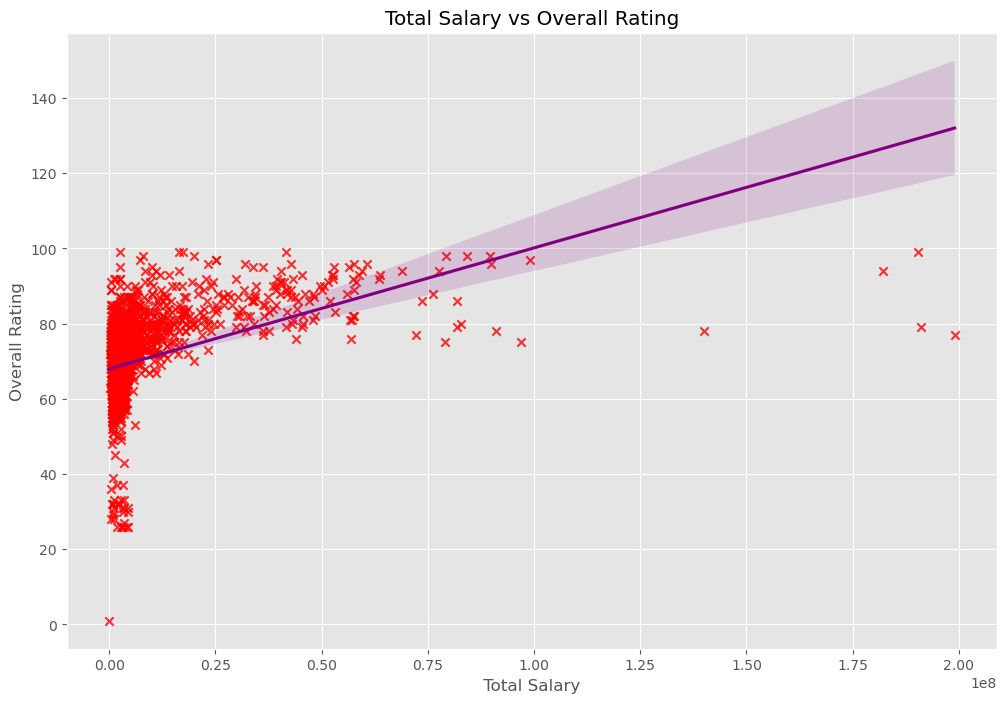

In [93]:
sns.regplot(x = ' Total Salary ', y='Overall Rating', data = df, 
            scatter_kws = {"color": "r" },marker="x", color=".3", line_kws=dict(color="purple")) 
plt.title("Total Salary vs Overall Rating")

Text(0.5, 1.0, 'Total Salary vs Awareness')

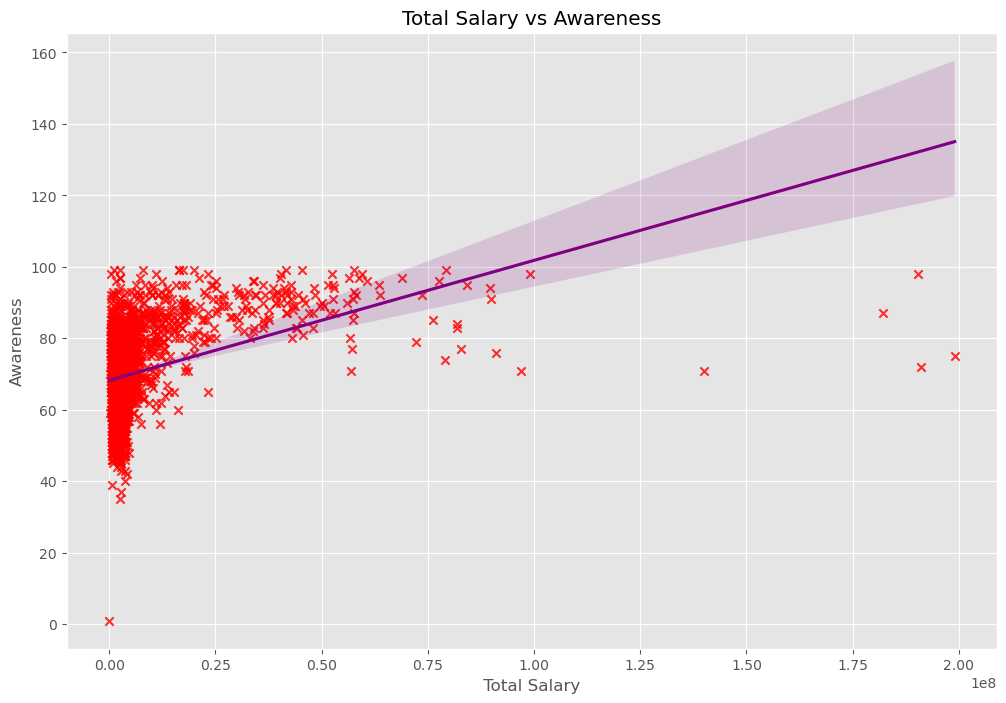

In [96]:
sns.regplot(x = ' Total Salary ', y='Awareness', data = df, 
            scatter_kws = {"color": "r" },marker="x", color=".3", line_kws=dict(color="purple")) 
plt.title("Total Salary vs Awareness")

From the 3 graphs we can see that the Total Salary and Signing bonus are highly correlated, while the total salary is moderately correlated with overall rating and awareness. This means that being paid handsomley does not truly eqaute to having a higher overall rating in the game. 

Lets determine which values overall are the most correlated

In [100]:
correlation_mat = num_df.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Overall Rating   Overall Rating     1.000000
                 Jersey Number     -0.150398
                 Speed              0.252093
                 Acceleration       0.225444
                 Strength           0.083142
                                      ...   
 Signing Bonus   Age                0.231751
                 Birthdate         -0.187675
                 Years Pro          0.309694
                  Total Salary      0.769709
                  Signing Bonus     1.000000
Length: 3844, dtype: float64

There are over 3844 values for pairs. Lets find the ones with high correlation only, where the correlation coefficient is greater than 0.7 or less than -0.7

In [103]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs.between(0.7,0.999))]
high_neg_corr = sorted_pairs[(sorted_pairs.between(-1,-0.7))]
#Add column header to new dataframe
high_corr.map("{:,.3f}".format)

Spectacular Catch     Acceleration            0.702
Acceleration          Spectacular Catch       0.702
Speed                 Catch In Traffic        0.705
Catch In Traffic      Speed                   0.705
Acceleration          Break Tackle            0.707
                                              ...  
Medium Route Running  Short Route Running     0.991
Throw Accuracy Mid    Throw Accuracy Short    0.991
Throw Accuracy Short  Throw Accuracy Mid      0.991
Medium Route Running  Deep Route Running      0.992
Deep Route Running    Medium Route Running    0.992
Length: 426, dtype: object

In [105]:
high_neg_corr.map("{:,.3f}".format)

Change Of Direction  Weight                 -0.830
Weight               Change Of Direction    -0.830
Speed                Weight                 -0.810
Weight               Speed                  -0.810
Juke Move            Weight                 -0.809
Weight               Juke Move              -0.809
Spin Move            Weight                 -0.801
Weight               Spin Move              -0.801
Agility              Weight                 -0.764
Weight               Agility                -0.764
Years Pro            Birthdate              -0.759
Birthdate            Years Pro              -0.759
Weight               Ball Carrier Vision    -0.758
Ball Carrier Vision  Weight                 -0.758
Acceleration         Weight                 -0.746
Weight               Acceleration           -0.746
Break Tackle         Weight                 -0.711
Weight               Break Tackle           -0.711
Age                  Birthdate              -0.706
Birthdate            Age       

There are over 500 pairs with highly correlated values. Let's look at just the first 15 numerical columns.

In [108]:
corr = num_df.corr()
#Calculate correlations for each block
corr_block1 = corr.iloc[:15, :15]

Text(0.5, 1.0, 'Heatmap of Variables 1-15 vs Variables 1-15')

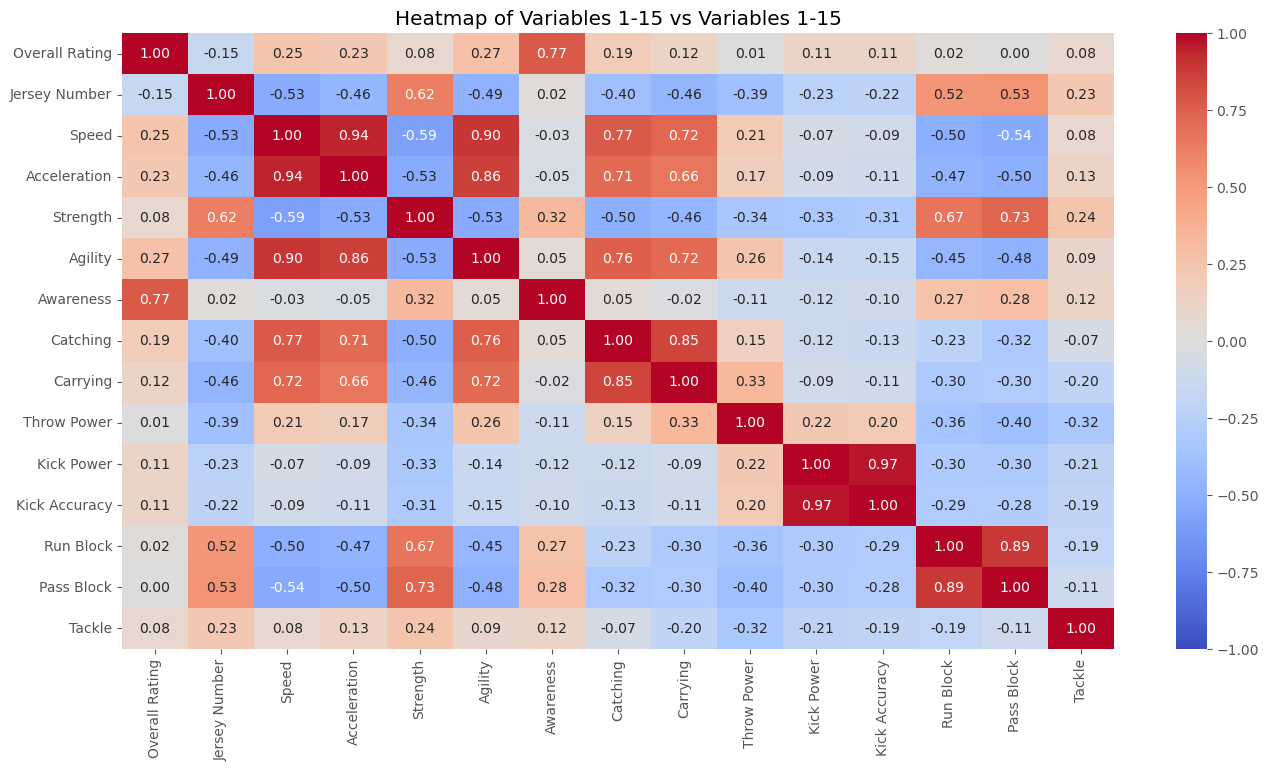

In [110]:
#Plot the heatmap of first 15 columns only
f, ax = plt.subplots(figsize=(16, 8))
hm = sns.heatmap(corr_block1, annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
ax.set_title("Heatmap of Variables 1-15 vs Variables 1-15")

Now let's see the highest correlated values for the highest average paid player position, the QB (Quarterback). First let's create a dataframe of just the QB's

In [113]:
qb_df = df[df['Position'] == 'QB']
qb_df

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,...,College,Total Salary,Signing Bonus,Player Handness,Birthdate_converted,Year,Month,Date,Total Salary thousands seperated,Signing Bonus thousands seperated
743,49ers,QB,Brock Purdy,73,13,78,86,63,81,78,...,Iowa State,3650000,80000,Right,1999-12-27,1999,Dec,27,"3,650,000","80,000"
1226,49ers,QB,Trey Lance,71,5,87,91,71,89,56,...,North Dakota St.,11940000,22160000,Right,2000-05-09,2000,May,9,"11,940,000","22,160,000"
2074,49ers,QB,Sam Darnold,71,14,80,82,60,80,72,...,USC,2210000,3500000,Right,1997-06-05,1997,Jun,5,"2,210,000","3,500,000"
112,49ers,QB,Brandon Allen,54,4,75,71,56,77,61,...,Arkansas,890000,200000,Right,1992-09-05,1992,Sep,5,"890,000","200,000"
1310,Bears,QB,Justin Fields,76,1,93,95,65,93,65,...,Ohio State,7790000,11080000,Right,1999-03-05,1999,Mar,5,"7,790,000","11,080,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,Titans,QB,Will Levis,69,8,80,85,68,83,66,...,Kentucky,5350000,3960000,Right,1999-06-27,1999,Jun,27,"5,350,000","3,960,000"
829,Titans,QB,Malik Willis,66,7,90,93,72,92,42,...,Liberty,4240000,920000,Right,1999-05-25,1999,May,25,"4,240,000","920,000"
1057,Vikings,QB,Kirk Cousins,84,8,75,73,52,69,82,...,Michigan St.,15500000,36160000,Right,1988-08-19,1988,Aug,19,"15,500,000","36,160,000"
1757,Vikings,QB,Nick Mullens,58,12,74,81,57,72,55,...,Southern Miss,2400000,1630000,Right,1995-03-21,1995,Mar,21,"2,400,000","1,630,000"


Now we have to again select only the nuerical data. From there, let's only map the data with a correlation value of greater than 0.7 or less than -0.7

In [116]:
num_qb_df = qb_df.select_dtypes(include = ['int64', 'float64']) #searches for numerical values only 

#finds correlation between Overall rating and other values 
qb_rating_corr = num_qb_df[num_qb_df.columns[0:]].corr()['Overall Rating'][:].to_frame().sort_values(by = ['Overall Rating'],ascending = False).round(3).head(20) 

qb_rating_corr 

,Overall Rating
Overall Rating,1.000
Throw Under Pressure,0.921
Throw Accuracy Mid,0.917
Throw On The Run,0.914
Throw Accuracy Deep,0.906
Throw Accuracy Short,0.880
Play Action,0.827
Awareness,0.806
Signing Bonus,0.750
Stamina,0.738


From the table, we can see there are around 10 values with correlation values above 0.7. Let's graph the highest correlation values.

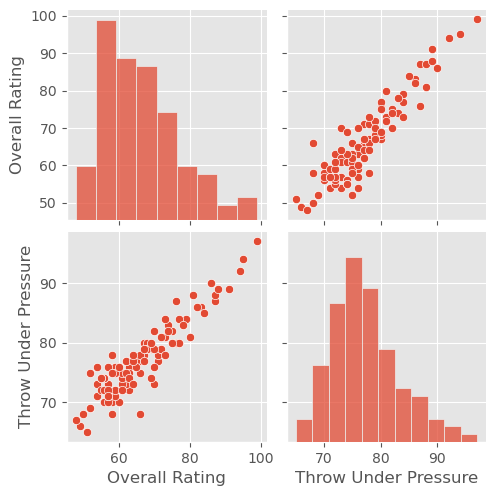

In [119]:
#pairplots of highly correlated variables  
qb_df_pp = qb_df[['Overall Rating','Throw Under Pressure']].copy()
sns.pairplot(qb_df_pp)

Now let's see the correlated values for overall average for Left Tackle (LT)

In [122]:
lt_df = df[df['Position'] == 'LT']
num_lt_df = lt_df.select_dtypes(include = ['int64', 'float64']) #searches for numerical values only 

#finds correlation between Overall rating and other values 
lt_rating_corr = num_lt_df[num_lt_df.columns[0:]].corr()['Overall Rating'][:].to_frame().sort_values(by = ['Overall Rating'],ascending = False).round(3).head(20) 

lt_rating_corr

,Overall Rating
Overall Rating,1.000
Pass Block,0.968
Pass Block Power,0.960
Pass Block Finesse,0.924
Awareness,0.889
Run Block,0.888
Run Block Power,0.854
Run Block Finesse,0.850
Stamina,0.813
Impact Blocking,0.801


From the table, we can see that the pass blocking and run blocking values are more correlated with the left tackles overall rating. Let's take a look at one of these relationships graphically.

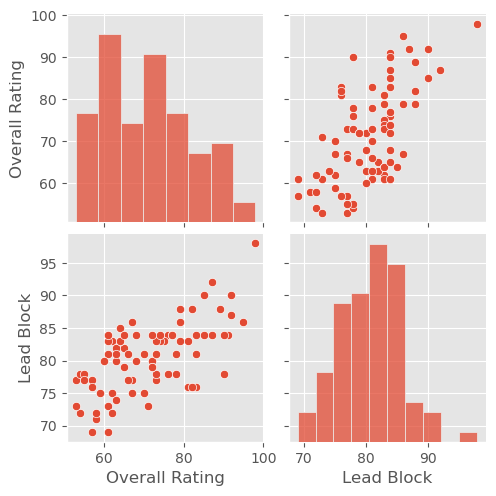

In [125]:
#pairplots of highly correlated variables  
lt_df_pp = lt_df[['Overall Rating','Lead Block']].copy()
sns.pairplot(lt_df_pp)

We can see that although the other blocking values are highly correlated with a LT overall rating, the lead block attribute is only moderately correlated with the the overall rating, diminishing its value against other attributes for the left tackle position

Now let's take a look at the highest paid defensive position, the LOLB (Left Outside Linebacker)

In [129]:
lolb_df = df[df['Position'] == 'LOLB']
num_lolb_df = lolb_df.select_dtypes(include = ['int64', 'float64']) #searches for numerical values only 

#finds correlation between Overall rating and other values 
lolb_rating_corr = num_lolb_df[num_lolb_df.columns[0:]].corr()['Overall Rating'][:].to_frame().sort_values(by = ['Overall Rating'],ascending = False).round(3).head(30) 

lolb_rating_corr

,Overall Rating
Overall Rating,1.000
Awareness,0.906
Play Recognition,0.901
Pursuit,0.836
Signing Bonus,0.793
Block Shedding,0.789
Finesse Moves,0.771
Tackle,0.735
Total Salary,0.685
Stamina,0.631


We can see that the physical attributes (pursuit, awareness, Finesse moves etc.) are highly correlated with the overall rating for a LOLB than the other run/pass features.

To sum up, the positions with the highest overall ratings does not necessarily mean they have the highest salary, while the rating for each position is dependent on certain skills the player need to have to suceed at their position.

Let's explore predicting a players rating based on certain attributes using multiple linear regression

In [134]:
player_df = qb_df[qb_df['Full Name'] == 'Justin Fields']
player_df

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,...,College,Total Salary,Signing Bonus,Player Handness,Birthdate_converted,Year,Month,Date,Total Salary thousands seperated,Signing Bonus thousands seperated
1310,Bears,QB,Justin Fields,76,1,93,95,65,93,65,...,Ohio State,7790000,11080000,Right,1999-03-05,1999,Mar,5,"7,790,000","11,080,000"


From this we see Justin Fields overall rating is 76. Let us see how close we can get to that rating using the highly correlated variables in a multiple linear regression model

In [137]:
X = num_qb_df[['Throw Under Pressure', 'Throw Accuracy Mid', 'Throw On The Run', 
               'Throw Accuracy Deep', 'Throw Accuracy Short','Play Action', 
               'Awareness', 'Stamina','Throw Power',]]
y = num_qb_df['Overall Rating']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the QB rating of the player based on certain attribute ratings from the original data:
predicted = regr.predict([[80, 79, 81, 
                           82, 85, 82, 
                           65, 89, 91]]).round(2)

print(predicted)

[72.29]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The value of around 72.29 is much lower than actual rating of 76. Let's put more variables in the model. 

In [140]:
X = num_qb_df[['Throw Under Pressure', 'Throw Accuracy Mid', 'Throw On The Run', 
               'Throw Accuracy Deep', 'Throw Accuracy Short','Play Action', 
               'Awareness', 'Stamina','Throw Power',
               'Break Sack', 'Break Tackle', 'Toughness',
               'Ball Carrier Vision', 'Stiff Arm', 'Juke Move',
               'Strength', 'Speed']]
y = num_qb_df['Overall Rating']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the QB rating of the player based on certain attribute ratings from the original data:
predicted = regr.predict([[80, 79, 81, 
                           82, 85, 82, 
                           65, 89, 91,
                           89, 80, 94,
                           96, 51, 87,
                           65, 93]]).round(2)

print(predicted)

[74.74]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


With more variables we can see the model performing better as the value is closer to the actual average.